In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset= tf.keras.datasets.cifar10.load_data()

In [3]:
(x_train,y_train),(x_test,y_test)= dataset

In [4]:
print(x_train.shape) #4D shape, good for keras API
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
np.isnan(x_train).any() #checking for missing data


False

In [6]:
# Normalization
x_train=x_train/255
x_test=x_test/255

#One hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)


In [7]:
print(x_train[100].shape)

(32, 32, 3)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',  padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [11]:
history=model.fit(x_train,y_train_cat,epochs=50 ,validation_data=(x_test,y_test_cat), callbacks=[es])

Epoch 1/50
1563/1563 [==============================] - 17s 8ms/step - loss: 1.9679 - accuracy: 0.3598 - val_loss: 1.1656 - val_accuracy: 0.5808
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1128 - accuracy: 0.6091 - val_loss: 1.0881 - val_accuracy: 0.6029
Epoch 3/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9114 - accuracy: 0.6815 - val_loss: 1.1947 - val_accuracy: 0.5909
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7999 - accuracy: 0.7229 - val_loss: 0.7080 - val_accuracy: 0.7552
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7165 - accuracy: 0.7551 - val_loss: 0.6149 - val_accuracy: 0.7898
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6610 - accuracy: 0.7736 - val_loss: 0.7061 - val_accuracy: 0.7615
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6105 - accuracy: 0.7932 - val_loss: 0.6674 - val_ac

In [12]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.4936 - accuracy: 0.8312


[0.4935603439807892, 0.8312000036239624]

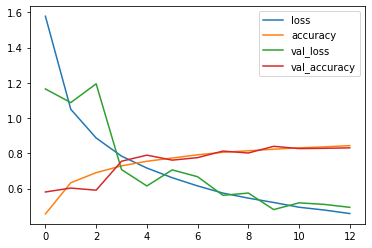

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [14]:
labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

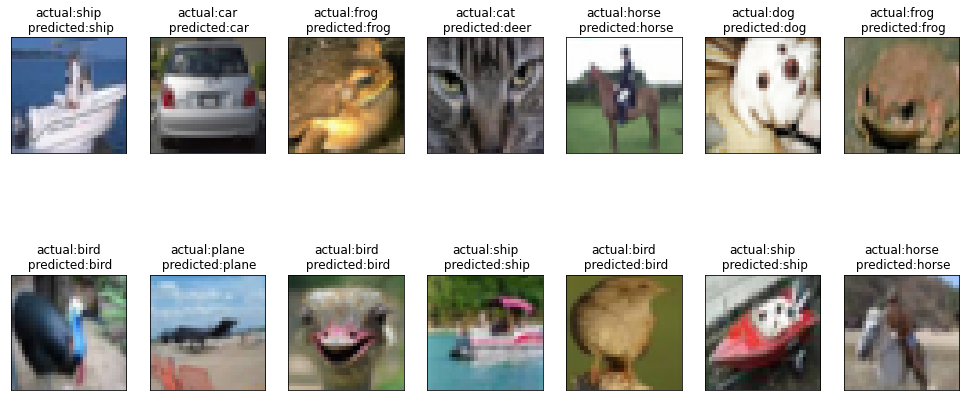

In [16]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(17, 8)) #ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
index = 9000
for i in range(2):
    for j in range(7):
        pred = model.predict(x_test[index].reshape(1,32,32,3))
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n predicted:' + labels[pred.argmax()])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()